In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

import os
import random
from shutil import copyfile

In [3]:
# Unzip file
import tarfile

filename = 'dataset/synthetic_sugarbeet_random_weeds'

my_tar = tarfile.open(filename + '.tar.gz')
my_tar.extractall('dataset')
my_tar.close()

In [111]:
def make_directory(fullpath):
    splitted_data = fullpath.split('/')
    
    new_dir = []
    current_dir = '.'
    
    for folder in splitted_data:           
        current_dir = current_dir + '/' + folder                
        if not os.path.isdir(current_dir + '/'):
            new_dir.append(current_dir)
            os.mkdir(current_dir)
    
    return new_dir
    
print(make_directory('dataset/synthetic_sugarbeet_random_weeds/tom/fougere/'))

[]


In [112]:
# Write a python function called split_data which takes
# a FOLDER_IMAGES directory containing the images
# a FOLDER_MASKS directory containing the masks
# a TARGET_FOLDER directory where the files will be copied to
# the TARGET_FOLDER directory will contain 2 subfolders train and test with the data splitted
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SPLIT SIZE is .9
# Then 90% of the images will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
def split_data(FOLDER_IMAGES, FOLDER_MASKS, TARGET_FOLDER, SPLIT_SIZE):

    TRAINING_FOLDER_NAME = TARGET_FOLDER + '/train/'
    TESTING_FOLDER_NAME = TARGET_FOLDER + '/test/'
    TRAINING_FOLDER_NAME_IMAGES = TARGET_FOLDER + '/train/images/img/'
    TRAINING_FOLDER_NAME_MASKS = TARGET_FOLDER + '/train/masks/img/'
    TESTING_FOLDER_NAME_IMAGES = TARGET_FOLDER + '/test/images/img/'
    TESTING_FOLDER_NAME_MASKS = TARGET_FOLDER + '/test/masks/img/'

    # Create directories
    make_directory(TRAINING_FOLDER_NAME_IMAGES)
    make_directory(TRAINING_FOLDER_NAME_MASKS)
    make_directory(TESTING_FOLDER_NAME_IMAGES)
    make_directory(TESTING_FOLDER_NAME_MASKS)
    
    # Remove all data in TRAINING and TESTING dir
    for i_file in os.listdir(TRAINING_FOLDER_NAME_IMAGES):
        os.remove(TRAINING_FOLDER_NAME_IMAGES + i_file)
    for i_file in os.listdir(TRAINING_FOLDER_NAME_MASKS):
        os.remove(TRAINING_FOLDER_NAME_MASKS + i_file)
    for i_file in os.listdir(TESTING_FOLDER_NAME_IMAGES):
        os.remove(TESTING_FOLDER_NAME_IMAGES + i_file)
    for i_file in os.listdir(TESTING_FOLDER_NAME_MASKS):
        os.remove(TESTING_FOLDER_NAME_MASKS + i_file)
    
    dataset = []
    
    # Check for z zero file length
    for i_file in os.listdir(FOLDER_IMAGES):
        data = i_file
        if (os.path.getsize(FOLDER_IMAGES + data) > 0):
            dataset.append(i_file)
        else:
            print('Skipped ' + i_file)
            print('Invalid file size! i.e Zero length.')
    
    # Number of files
    nb_files = len(dataset)
    nb_files_training = int(nb_files * SPLIT_SIZE)
    nb_files_testing = nb_files - nb_files_training
    
    # Suffle dataset
    shuffled_dataset = random.sample(dataset, len(dataset))
        
    # Copy files
    for i_num, i_file in enumerate(shuffled_dataset):
        if i_num < nb_files_training:
            new_path_images = TRAINING_FOLDER_NAME_IMAGES + i_file
            new_path_masks = TRAINING_FOLDER_NAME_MASKS + i_file
        else:
            new_path_images = TESTING_FOLDER_NAME_IMAGES + i_file
            new_path_masks = TESTING_FOLDER_NAME_MASKS + i_file
            
        copyfile(FOLDER_IMAGES + i_file, new_path_images)
        copyfile(FOLDER_MASKS + i_file, new_path_masks)

In [114]:
# Split data
FOLDER_IMAGES = "dataset/synthetic_sugarbeet_random_weeds/rgb/"
FOLDER_MASKS = "dataset/synthetic_sugarbeet_random_weeds/gt/"
TARGET_FOLDER = "dataset/synthetic_sugarbeet_random_weeds/train_test/"

split_size = .9
split_data(FOLDER_IMAGES, FOLDER_MASKS, TARGET_FOLDER, split_size)

Number of trained images: 1126


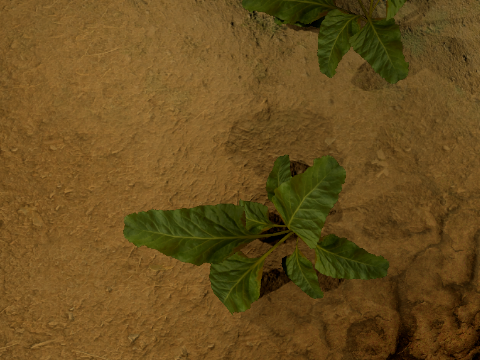

In [116]:
# Plot image
from IPython.display import Image

pathname = 'train/images/img/'

list_files = os.listdir(TARGET_FOLDER + pathname)
nb_files = len(list_files)
print('Number of trained images:', nb_files)
 
Image(TARGET_FOLDER + pathname + list_files[1]) 

In [120]:
# Data augmentation (for train dataset)
SEED = 1

train_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
                                                                horizontal_flip=True,
                                                                rotation_range=20,
                                                                zoom_range=0.2,
                                                                width_shift_range = 0.1,
                                                                height_shift_range = 0.1)
train_image_generator= train_image_datagen.flow_from_directory(TARGET_FOLDER + 'train/images',
                                                               batch_size=10,
                                                               target_size=(480, 360),
                                                               class_mode=None,
                                                               seed=SEED)

train_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
                                                                horizontal_flip=True,
                                                                rotation_range=20,
                                                                zoom_range=0.2,
                                                                width_shift_range = 0.1,
                                                                height_shift_range = 0.1)
train_mask_generator= train_image_datagen.flow_from_directory(TARGET_FOLDER + 'train/masks/',
                                                               batch_size=10,
                                                               target_size=(480, 360),
                                                               class_mode=None,
                                                               seed=SEED)

Found 1126 images belonging to 1 classes.
Found 1126 images belonging to 1 classes.


In [122]:
# Data augmentation (for validation dataset)
SEED = 1

val_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
val_image_generator= val_image_datagen.flow_from_directory(TARGET_FOLDER + 'test/images',
                                                               batch_size=10,
                                                               target_size=(480, 360),
                                                               class_mode=None,
                                                               seed=SEED)

val_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
val_mask_generator= val_image_datagen.flow_from_directory(TARGET_FOLDER + 'test/masks/',
                                                               batch_size=10,
                                                               target_size=(480, 360),
                                                               class_mode=None,
                                                               seed=SEED)

Found 126 images belonging to 1 classes.
Found 126 images belonging to 1 classes.


In [121]:
# Create generator
def my_image_mask_generator(image_data_generator, mask_data_generator):
    new_generator = zip(image_data_generator, mask_data_generator)
    for (img, mask) in new_generator:
        yield (img, mask)

In [ ]:
from keras.optimizers import Adam
# Your other related imports here...

# Create custom generator for training images and masks
my_generator = my_image_mask_generator(image_data_generator, mask_data_generator)

model = ... # Define your model here
# Compile your model here
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train your model here
model.fit_generator(my_generator,...)